

> # Salários Profissionais de Data Science 2023



In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 10000)
df = pd.read_csv("ds_salaries.csv")
#teste
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [486]:
df.describe(include="all")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [487]:
len(df)

3755

In [488]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [489]:
df.duplicated().sum()

np.int64(1171)

In [490]:
df = df.drop('salary', axis=1)
df.head(50)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,USD,147100,US,0,US,M


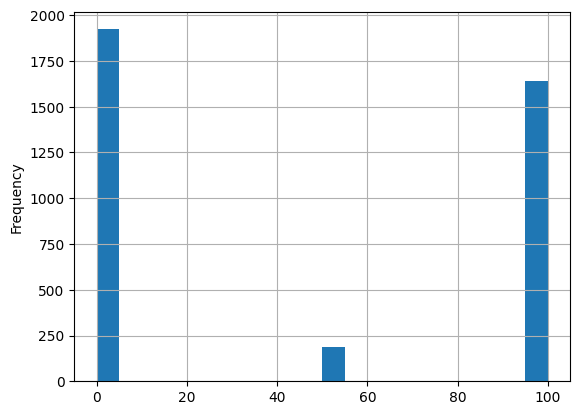

In [491]:
hist =  df.remote_ratio.plot.hist(bins=20)
plt.grid()

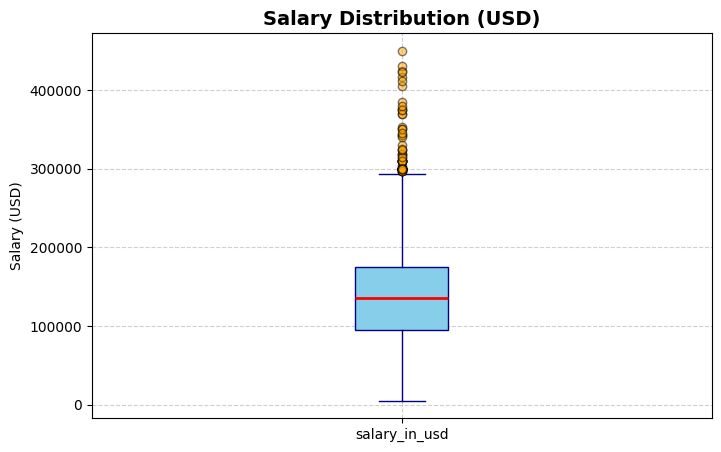

Primeiro quartil:  95000.0
Segundo quartil:  135000.0
Terceiro quartil:  175000.0
Limite superior :  295000.0
Limite inferior :  -25000.0


In [492]:
plt.figure(figsize=(8, 5))
box = df.boxplot(column='salary_in_usd', patch_artist=True, boxprops=dict(facecolor='skyblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'),
                 flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))

plt.title('Salary Distribution (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

q1 = df['salary_in_usd'].quantile(.25)
q2 = df['salary_in_usd'].quantile(.50)
q3 = df['salary_in_usd'].quantile(.75)

print("Primeiro quartil: ", q1)
print("Segundo quartil: ", q2)
print("Terceiro quartil: ", q3)

iqr = q3 - q1

superior = q3 + 1.5 * iqr
inferior = q1 - 1.5 * iqr

print("Limite superior : ", superior)
print("Limite inferior : ", inferior)


Df tem o seguinte numero de outliers:  63


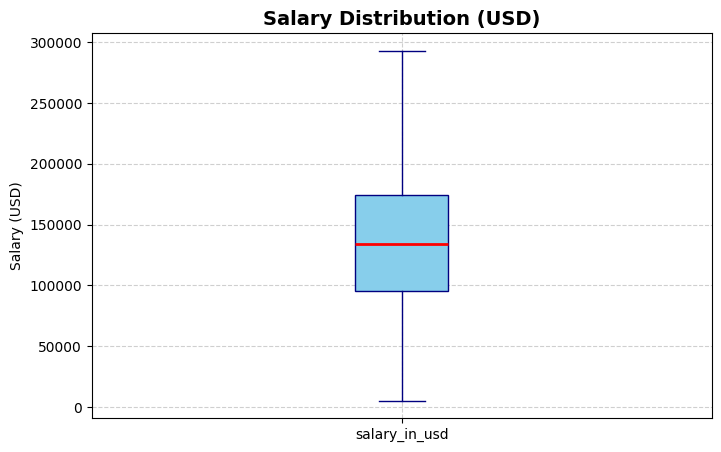

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,SE,FT,Computer Vision Engineer,USD,342810,US,0,US,M
68,2023,SE,FT,Applied Scientist,USD,309400,US,0,US,L
83,2022,EN,FT,AI Developer,USD,300000,IN,50,IN,L
133,2023,SE,FT,Machine Learning Engineer,USD,342300,US,0,US,L
145,2023,SE,FT,Machine Learning Engineer,USD,318300,US,100,US,M


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


63


In [493]:
dfSemOutlier = df.loc[df['salary_in_usd'] <= superior]
print("Df tem o seguinte numero de outliers: ",len(df)-len(dfSemOutlier))
plt.figure(figsize=(8, 5))
box = dfSemOutlier.boxplot(column='salary_in_usd', patch_artist=True, boxprops=dict(facecolor='skyblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'),
                 flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))

plt.title('Salary Distribution (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

dfApenasOutlier = df.loc[df['salary_in_usd'] >= superior]
display(dfApenasOutlier.head(5))
display(df.head(5))
print(len(dfApenasOutlier))


A variável "experience_level" possui 4 valores únicos
A variável "employment_type" possui 4 valores únicos
A variável "job_title" possui 93 valores únicos
A variável "salary_currency" possui 20 valores únicos
A variável "employee_residence" possui 78 valores únicos
A variável "company_location" possui 72 valores únicos
A variável "company_size" possui 3 valores únicos

{'Power BI Developer': 1, 'Product Data Scientist': 2, '3D Computer Vision Researcher': 3, 'Staff Data Analyst': 4, 'Product Data Analyst': 5, 'Autonomous Vehicle Technician': 6, 'Compliance Data Analyst': 7, 'Principal Data Architect': 8, 'Machine Learning Research Engineer': 9, 'Insight Analyst': 10, 'AI Scientist': 11, 'Data DevOps Engineer': 12, 'BI Data Analyst': 13, 'AI Programmer': 14, 'Business Data Analyst': 15, 'BI Data Engineer': 16, 'Big Data Engineer': 17, 'Finance Data Analyst': 18, 'Software Data Engineer': 19, 'Data Analytics Engineer': 20, 'Marketing Data Engineer': 21, 'Lead Data Analyst': 22, 'Data Man

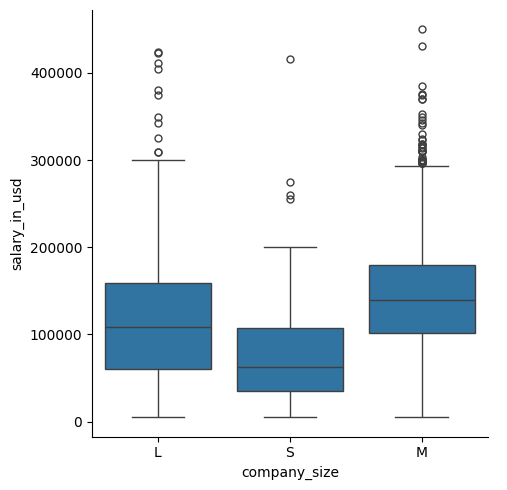

In [494]:
sns.catplot(data=df, x="company_size", y="salary_in_usd", kind="box")

cat = [col for col in df.columns if df[col].dtype=='object']
for col in cat:
  # print(f'A variável "{col}" possui {df[col].nunique()} valores únicos: {df[col].unique()}')
  print(f'A variável "{col}" possui {df[col].nunique()} valores únicos')

print()
ordered_job_title = dict(df.groupby('job_title')['salary_in_usd'].median().sort_values())
ordered_job_title = list(ordered_job_title.keys())
job_title_map = {ordered_job_title[i]: i+1 for i in range(len(ordered_job_title))}
print(job_title_map)



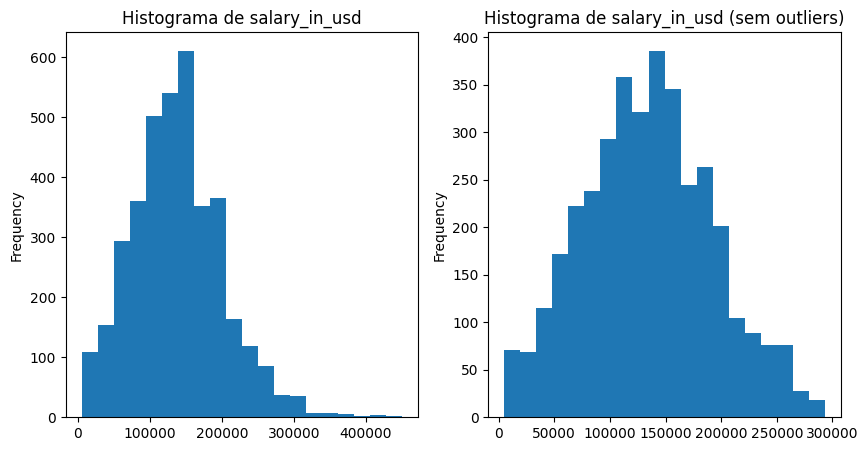

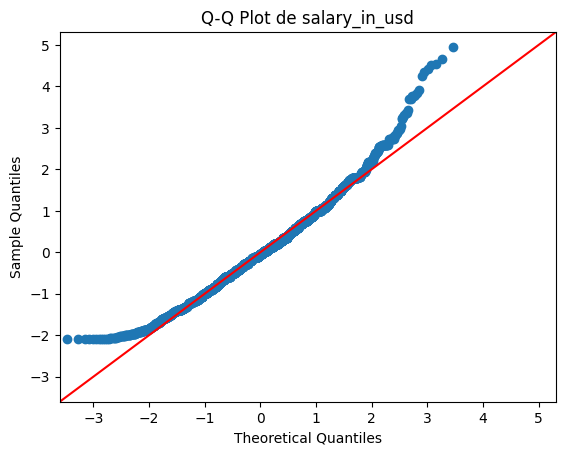

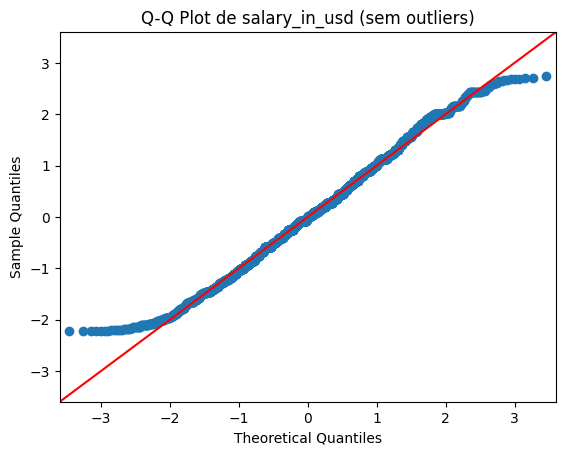

Para a distribuição de salários em USD
W=0.9827, p-valor=0.0000
Há evidências suficientes para rejeitar a hipótese de normalidade.
Para a distribuição de salários em USD (sem outliers)
W=0.9940, p-valor=0.0000
Há evidências suficientes para rejeitar a hipótese de normalidade.


In [495]:
import statsmodels.api as sm
from scipy.stats import shapiro

plt.figure(figsize=(10, 5))

plt.subplot(121)
df.salary_in_usd.plot.hist(bins=20)
plt.title('Histograma de salary_in_usd')

plt.subplot(122)
dfSemOutlier.salary_in_usd.plot.hist(bins=20)
plt.title('Histograma de salary_in_usd (sem outliers)')

sm.qqplot(df['salary_in_usd'], line='45', fit=True)
plt.title('Q-Q Plot de salary_in_usd')

sm.qqplot(dfSemOutlier['salary_in_usd'], line='45', fit=True)
plt.title('Q-Q Plot de salary_in_usd (sem outliers)')

plt.show()



# Teste de Shapiro-Wilk para checar normalidade

alpha = .05
W, p_value = shapiro(df['salary_in_usd'])

print("Para a distribuição de salários em USD")
if(p_value > alpha):
    print(f"W={W:.4f}, p-valor={p_value:.4f}\nNão há evidências suficientes para rejeitar a hipótese de normalidade.")
else:
    print(f"W={W:.4f}, p-valor={p_value:.4f}\nHá evidências suficientes para rejeitar a hipótese de normalidade.")


W, p_value = shapiro(dfSemOutlier['salary_in_usd'])

print("Para a distribuição de salários em USD (sem outliers)")
if(p_value > alpha):
    print(f"W={W:.4f}, p-valor={p_value:.4f}\nNão há evidências suficientes para rejeitar a hipótese de normalidade.")
else:
    print(f"W={W:.4f}, p-valor={p_value:.4f}\nHá evidências suficientes para rejeitar a hipótese de normalidade.")

# Portanto, não podemos utilizar ANOVA para a feature selection, já que esta assume premissa de normalidade.
# Buscar outros testes para a feature selection que não assumam premissa de normalidade.



Como não conseguimos utilizar ANOVA, utilizaremos K-Fold-Target-Encoder para transformar nosso dados categóricos em valores numéricos, o que vai nos permitir encontrar a correlação das features em relação ao target utilizando Spearman o Pearson.

In [496]:
from sklearn.preprocessing import TargetEncoder

enconder = TargetEncoder(target_type='continuous', smooth=1,cv=1000, shuffle=True)

cat = [col for col in df.columns if df[col].dtype=='object']
print(cat)

for col in cat:
  x = df[[col]]
  y = df['salary_in_usd']
  x_trans = enconder.fit_transform(x,y)
  df[[col]] = x_trans


df.head(100)



['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,153066.107364,138318.605964,204639.570748,62501.050157,85847,61109.894420,100,58063.388980,118098.964465
1,2023,104609.422908,124207.872327,161518.000235,149455.648600,30000,152894.560335,100,151891.554245,78198.243213
2,2023,104665.220757,124656.285288,161648.635473,149414.190795,25500,152837.912219,100,151882.075123,78984.174607
3,2023,153050.478955,138296.773073,140825.216218,149362.360775,175000,131782.101749,100,131487.033046,143095.250469
4,2023,153041.122713,138305.936908,140875.990161,149327.633419,120000,132429.245334,100,132119.455970,143137.927346
5,2023,152997.427671,138262.856786,188804.431251,149323.173490,222200,152801.316442,0,151770.430769,118114.575678
6,2023,153072.801585,138302.813599,191244.625990,149386.987021,136000,152792.521695,0,151824.586790,117737.660662
7,2023,152991.660888,138279.736241,140772.836979,149373.944116,219000,131264.878175,0,130981.445224,143085.076674
8,2023,153032.236358,138355.708989,140865.674159,149330.567921,141000,132182.426809,0,131878.873769,143162.211731
9,2023,153063.252615,138343.889502,140878.655375,149356.183406,147100,152805.724641,0,151746.429640,143096.938643
